# CAR TALK REVISTED: PRICING BY YOUR BOOTSTRAPS
**_The search for normality and significance_**
### Data Science 410 BB
#### University of Washington Professional & Continuing Education
#### Homework 5: Applying bootstrap resamping to  auto prices
#### Leo Salemann, 2/8/18


# Load Data, Setup some Functions

In [1]:
read.auto = function(file = '../../../DataScience410/Lecture1/Automobile price data _Raw_.csv'){
  ## Read the csv file
  auto.price <- read.csv(file, header = TRUE, 
                      stringsAsFactors = FALSE)

  ## Coerce some character columns to numeric
  numcols <- c('price', 'bore', 'stroke', 'horsepower', 'peak.rpm')
  auto.price[, numcols] <- lapply(auto.price[, numcols], as.numeric)

  ## Remove cases or rows with missing values. In this case we keep the 
  ## rows which do not have nas. 
  auto.price[complete.cases(auto.price), ]
}
auto.price = read.auto()

Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”Warning message in lapply(auto.price[, numcols], as.numeric):
“NAs introduced by coercion”

In [2]:
plot.hist <- function(a, maxs, mins, cols = 'difference of means', 
                      nbins = 80, p = 0.05, digits = 3, ...) {
    
  breaks = seq(maxs, mins, length.out = (nbins + 1))
  
  m     = mean(a)
  ci_lo = quantile(a, probs = p/2)
  ci_hi = quantile(a, probs = (1 - p/2)) 
    
  p_m     = format(round(m,     digits), nsmall=digits)
  p_ci_lo = format(round(ci_lo, digits), nsmall=digits)
  p_ci_hi = format(round(ci_hi, digits), nsmall=digits)

  hist(a, breaks = breaks, 
       main = paste('Histogram of', cols, '\n',
                    'mean=', p_m, '; confidence interval =[', p_ci_lo, ', ', p_ci_hi, ']'), 
       xlab = cols)
  abline(v = m, lwd = 4, col = 'red')
  abline(v = 0, lwd = 4, col = 'blue')
  abline(v = ci_lo, lty = 3, col = 'red', lwd = 3)  
  abline(v = ci_hi, lty = 3, col = 'red', lwd = 3)
}

plot.t <- function(a, b, cols = c('pop_A', 'pop_B'), nbins = 80, 
                   p_cutoff = 0.05, format_digits = 3){
  maxs = max(c(max(a), max(b)))
  mins = min(c(min(a), min(b)))
  par(mfrow = c(2, 1))
  plot.hist(a, maxs, mins, cols = cols[1], nbins, p_cutoff, format_digits)
  plot.hist(b, maxs, mins, cols = cols[2], nbins, p_cutoff, format_digits)
  par(mfrow = c(1, 1))
}


In [3]:
## Bootstrap the difference in means of sons and daughters
plot.diff <- function(a, cols = 'difference of means', nbins = 80, 
                      pval = 0.05, print_digits = 2){
  maxs = max(a)
  mins = min(a)
  plot.hist(a, maxs, mins, cols = cols[1], p_cutoff = pval, 
            format_digits = print_digits)
}

In [4]:
library(resample)
library(simpleboot)

Loading required package: boot
Simple Bootstrap Routines (1.1-3 2008-04-30)


# Bootstrapped Means, Aspiration and Fuel
Compare the difference of the bootstrap resampled mean of the log price of autos grouped by 1) aspiration and 2) fuel type. Use both numerical and graphical methods for your comparison. Are these means different within a 95% confidence interval? How do your conclusions compare to the results you obtained using the t-test last week?

## Difference of means, bootstrapped gas vs. diesel

In [5]:
autos.gas = auto.price[auto.price$fuel.type == 'gas',]
autos.diesel = auto.price[auto.price$fuel.type == 'diesel',]

Loading required package: repr


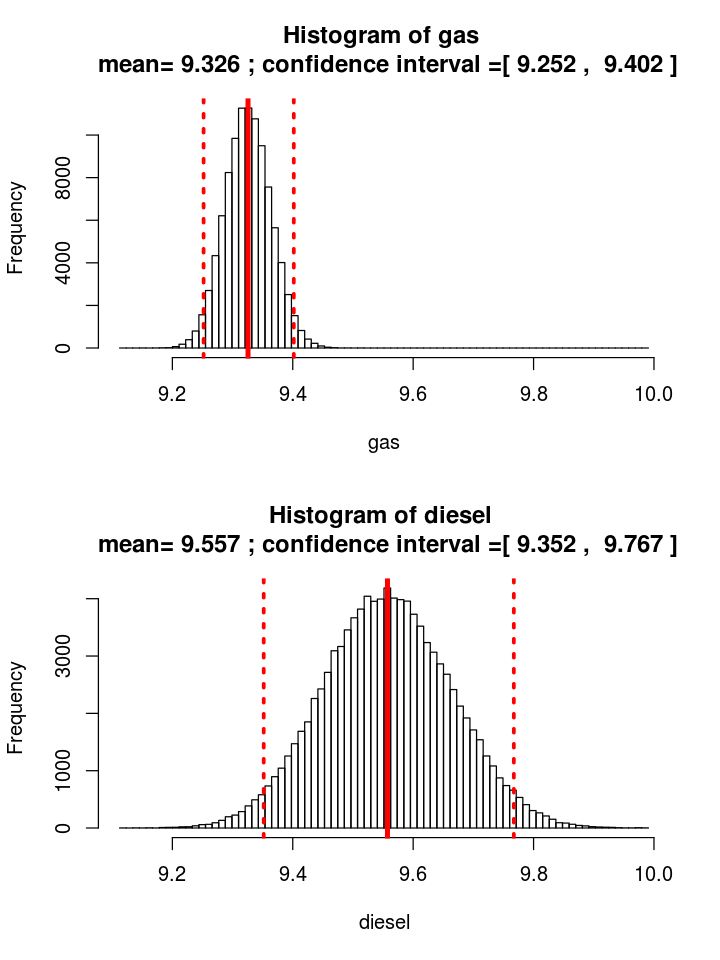

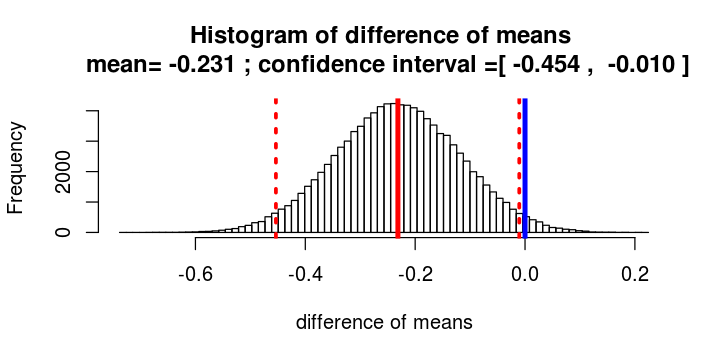

In [6]:
require(repr)
options(repr.plot.width=6, repr.plot.height=2)

## Bootstrap the mean of the gas vs. diesel, plot individual histograms
mean.boot.gas = one.boot(log(autos.gas$price), mean, R = 100000)
mean.boot.diesel = one.boot(log(autos.diesel$price), mean, R = 100000)
options(repr.plot.width=6, repr.plot.height=8)
plot.t(mean.boot.gas$t, mean.boot.diesel$t, nbins = 80, cols = c('gas', 'diesel'), format_digits = 3)


# Plot the difference
options(repr.plot.width=6, repr.plot.height=3)
two.boot.mean = two.boot(log(autos.gas$price), log(autos.diesel$price), mean, R = 100000)
plot.diff(two.boot.mean$t)

## Conclusions
- Histograms exhibit some overlap, but the mean of one does not fall within the 95% conficence interval of the mean of the other.
- Mean log(price) is 0.232 less for gas cars vs. diesel.  Both sides of the 95% confidence level are to the left of zero.
- Fuel type has a significant impact on price
- All paris of means fall within a 95% confidence interval (althought just-barely for gas vs. diesel).

## Dfference of means, bootstrapped standard vs. turbo

In [7]:
autos.std = auto.price[auto.price$aspiration == 'std',]
autos.turbo = auto.price[auto.price$aspiration == 'turbo',]

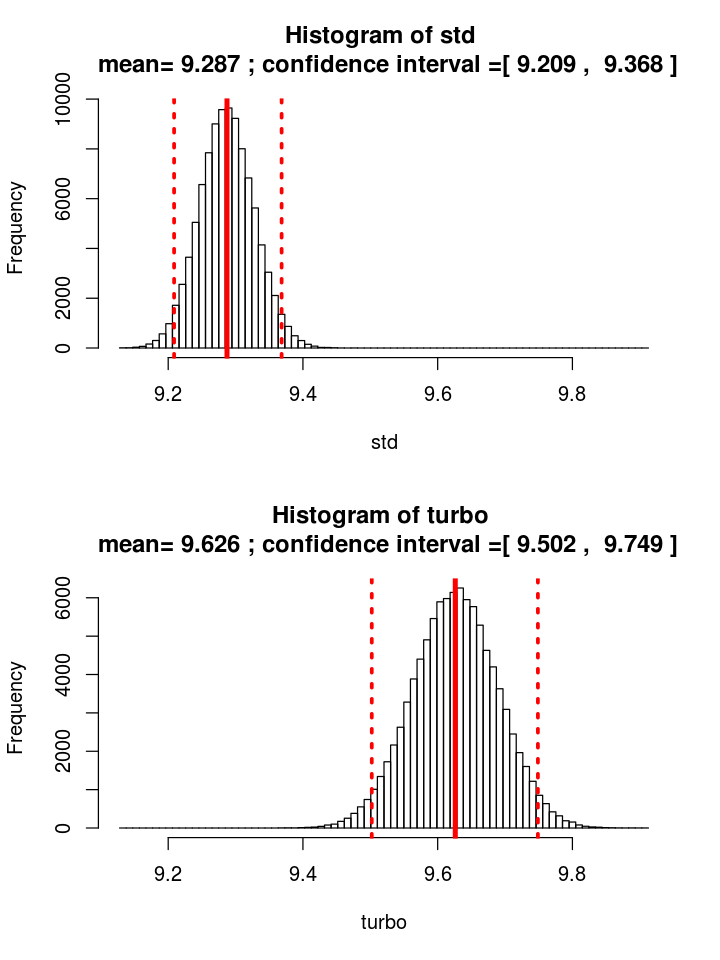

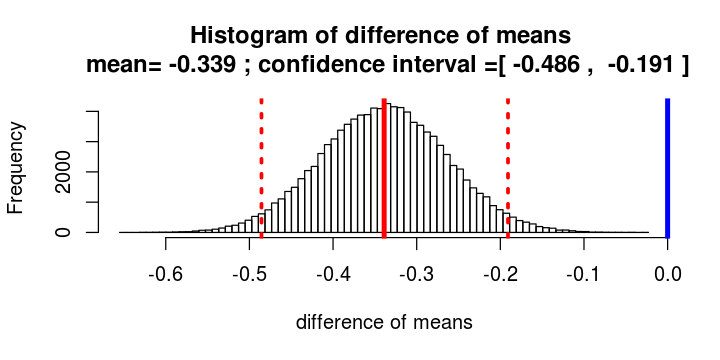

In [8]:
require(repr)
options(repr.plot.width=6, repr.plot.height=2)

## Bootstrap the mean of the gas vs. diesel, plot individual histograms
mean.boot.std = one.boot(log(autos.std$price), mean, R = 100000)
mean.boot.turbo = one.boot(log(autos.turbo$price), mean, R = 100000)
options(repr.plot.width=6, repr.plot.height=8)
plot.t(mean.boot.std$t, mean.boot.turbo$t, nbins = 80, cols = c('std', 'turbo'))

# Plot the difference
options(repr.plot.width=6, repr.plot.height=3)
two.boot.mean = two.boot(log(autos.std$price), log(autos.turbo$price), mean, R = 100000)
plot.diff(two.boot.mean$t)

## Conclusion
- Individual histograms are widely separated.
- Difference histogram, shows a mean and 95% confidence interval far from zero.
- Mean log(price) of standard fuel cars is about 0.34 less than turbo
- Fuel aspiration has a significant impact on price

# Comparison to Last Week
- Most of the results agree with the T-test, althought the analysis is easier with these histograms & confidence intervals.
- Gas vs. Diesel is unique in that failed the T-test from last week, but (just-barely) passes the the bootstrapped difference-of-means test.

# Bootstrapped Means, Body Style
Compare the differences of the bootstrap resampled mean of the log price of the autos grouped by body style. You will need to do this pair wise; e.g. between each possible pairing of body styles. Use both numerical and graphical methods for your comparison. Which pairs of means are different within a 95% confidence interval? How do your conclusions compare to the results you obtained from the ANOVA and Tukey’s HSD analysis you performed last week?

### Gather up the groupings

In [9]:
autos.sedan     = auto.price[auto.price$body.style == 'sedan',]
autos.hatchback = auto.price[auto.price$body.style == 'hatchback',]
autos.wagon     = auto.price[auto.price$body.style == 'wagon',]

In [10]:
## Bootstrap the mean of the gas vs. diesel, plot individual histograms
mean.boot.sedan     = one.boot(log(autos.sedan$price), mean, R = 100000)
mean.boot.hatchback = one.boot(log(autos.hatchback$price), mean, R = 100000)
mean.boot.wagon     = one.boot(log(autos.wagon$price), mean, R = 100000)

#### Sedan vs. Hatchback

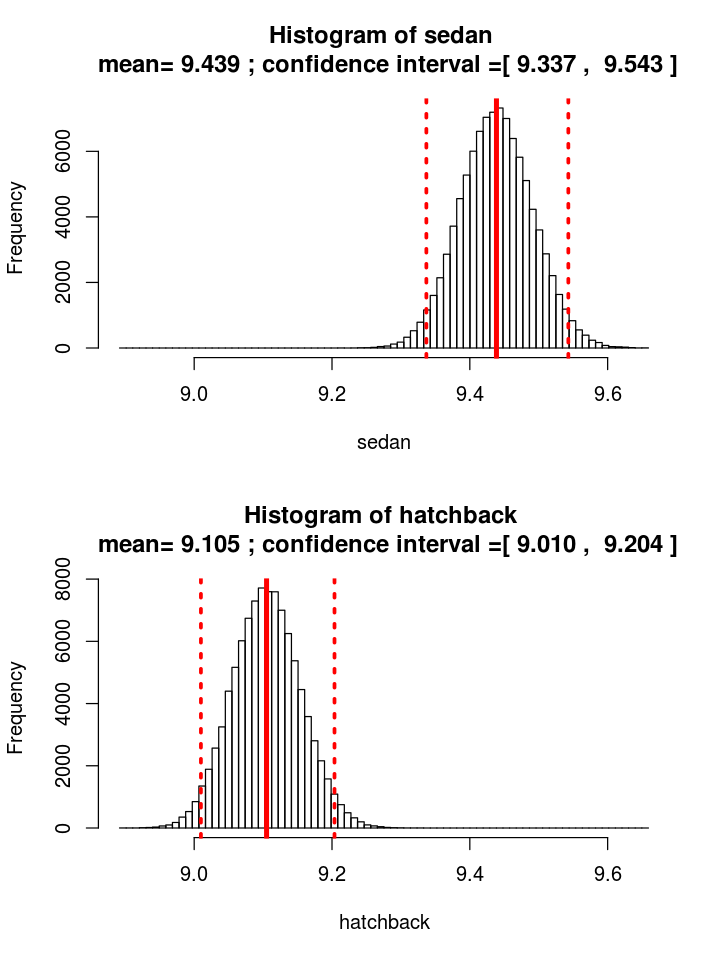

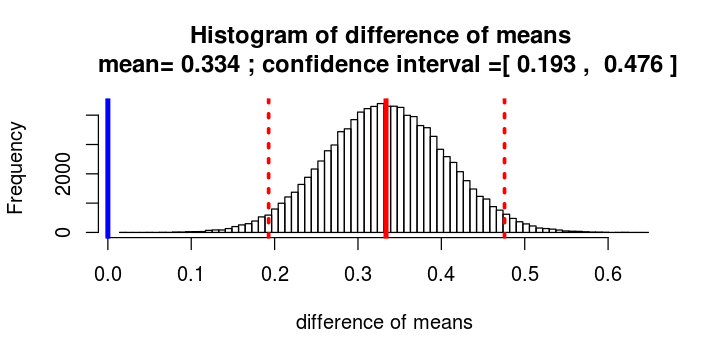

In [11]:
options(repr.plot.width=6, repr.plot.height=8)
plot.t(mean.boot.sedan$t, mean.boot.hatchback$t, nbins = 80, cols = c('sedan', 'hatchback'))

# Plot the difference
options(repr.plot.width=6, repr.plot.height=3)
two.boot.mean = two.boot(log(autos.sedan$price), log(autos.hatchback$price), mean, R = 100000)
plot.diff(two.boot.mean$t)

#### Wagon vs. Hatchback

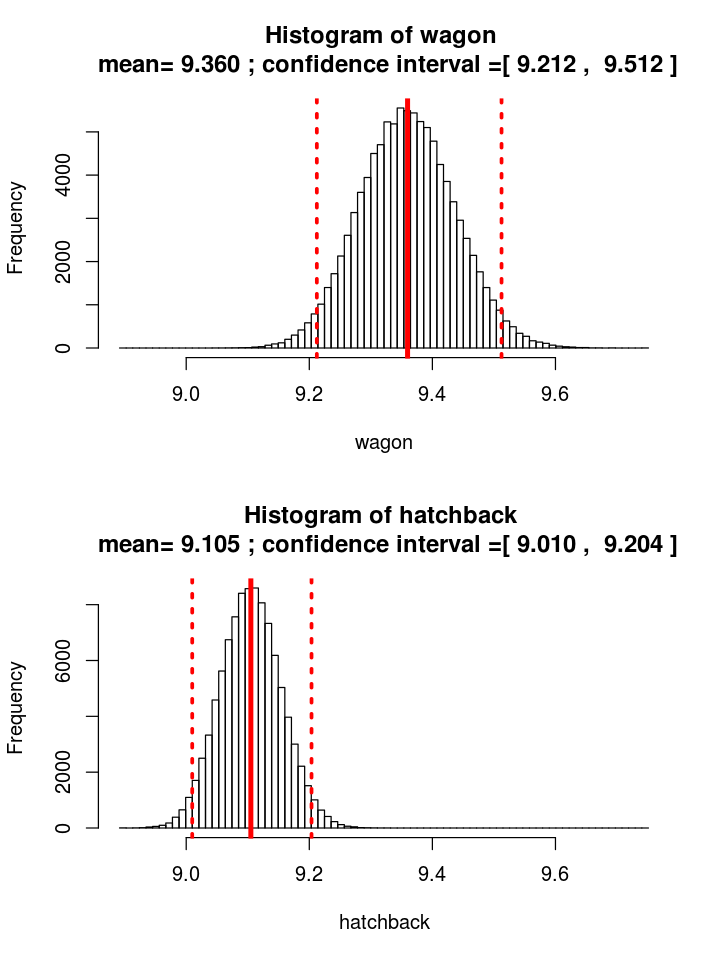

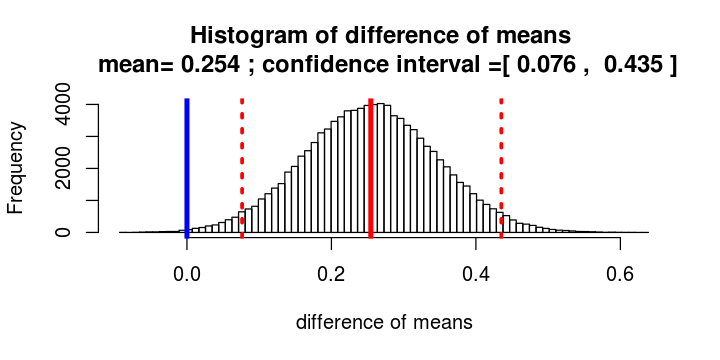

In [12]:
options(repr.plot.width=6, repr.plot.height=8)
plot.t(mean.boot.wagon$t, mean.boot.hatchback$t, nbins = 80, cols = c('wagon', 'hatchback'))

# Plot the difference
options(repr.plot.width=6, repr.plot.height=3)
two.boot.mean = two.boot(log(autos.wagon$price), log(autos.hatchback$price), mean, R = 100000)
plot.diff(two.boot.mean$t)

#### Wagon vs. Sedan

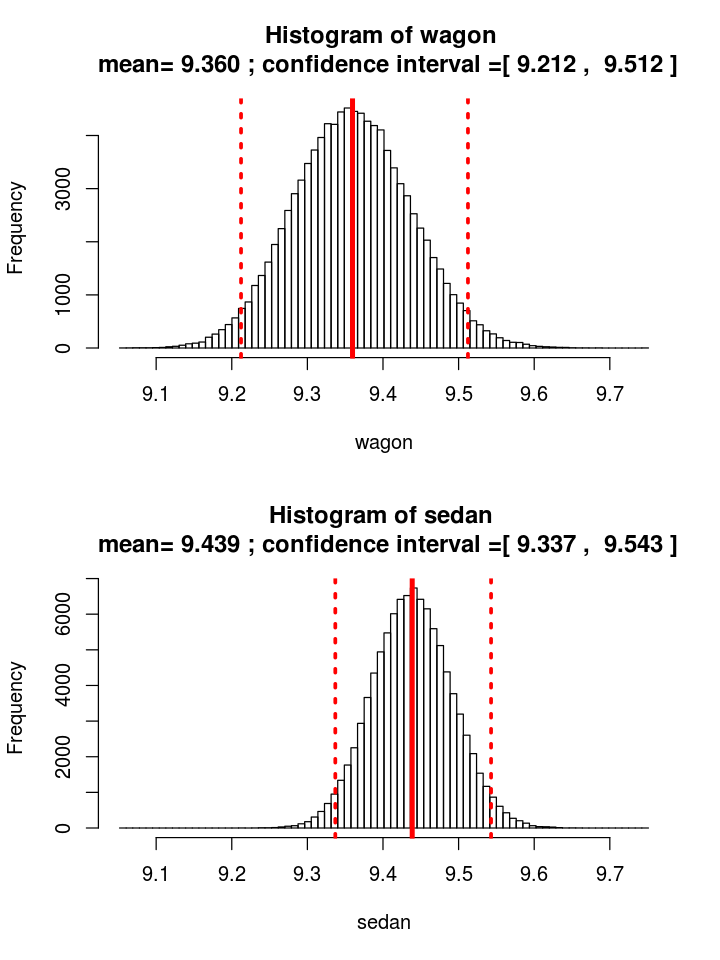

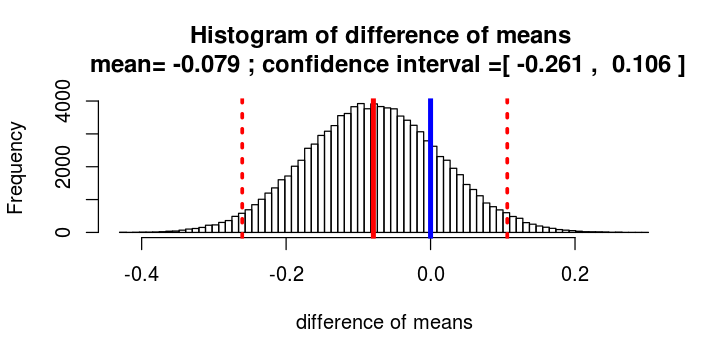

In [13]:
options(repr.plot.width=6, repr.plot.height=8)
plot.t(mean.boot.wagon$t, mean.boot.sedan$t, nbins = 80, cols = c('wagon', 'sedan'))

# Plot the difference
options(repr.plot.width=6, repr.plot.height=3)
two.boot.mean = two.boot(log(autos.wagon$price), log(autos.sedan$price), mean, R = 100000)
plot.diff(two.boot.mean$t)

## Compare to ANOVA/TukeyHSD

### Brief digression back to ANOVA

In [14]:
autos.body.style = auto.price[auto.price$body.style %in% c("hatchback","sedan", "wagon"),]
autos.body.style.aov = aov(log(price) ~ body.style, data = autos.body.style)
autos.body.style.hsd = TukeyHSD(autos.body.style.aov)

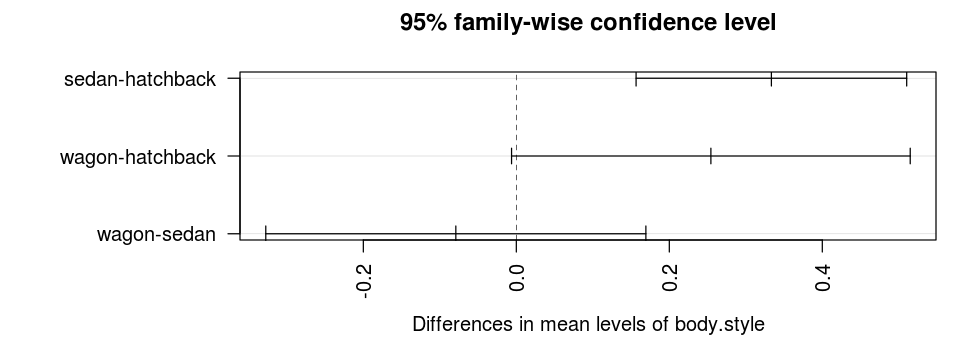

In [15]:
options(repr.plot.width=8, repr.plot.height=3)
par (las=2)
par(mar=c(5,10,3,1))
plot(autos.body.style.hsd)

### Conclusion, Bootstrap vs. ANOVA, Graphical Approach
 - TukeyHSD says ...
   - Sedan/Hatchback well-differentiated
   - Wagon/Hatchback almost/not-quite differentiated
   - Wagon/Sedan not at all differentiated
 - Bootsrap says ... 
   - Sedan/Hatchback well-differentiated
   - Wagon/Hatchback well-differentiated
   - Wagon/Sedan not at all differentiated
   
Bootstratpping found differentiaon where TukeyHSD didn't. Seems that you can use TukeyHSD to find the "near-misses" (e.g., Wagon vs. Hatchback) then verify them with Bootstratp